In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import json, math

In [2]:
with open("stats.json", "r") as file:
    data = json.loads(file.read())

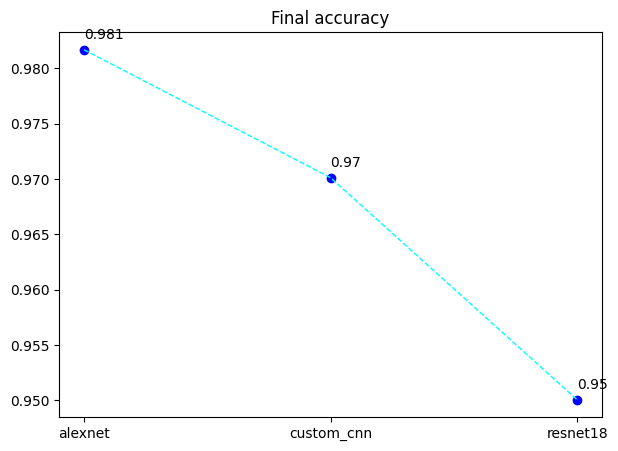

In [3]:
# final accuracy

lists = sorted(list(data["final_accuracy"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples
x, y = zip(*lists)

fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, c='blue')
ax.set_title('Final accuracy')
plt.plot(x, y, c='cyan', linestyle='dashed', linewidth=1)
for i,j in zip(x,y):
    val = math.floor(j*1000)/1000
    ax.annotate(str(f"{val}"),xy=(i,j+0.001))
plt.show()

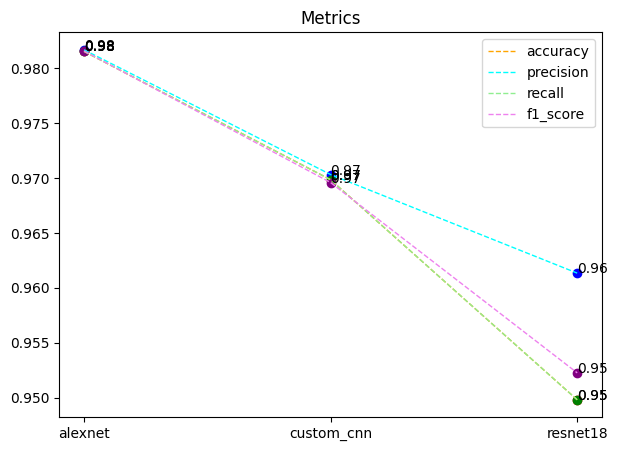

In [4]:
# metrics

fig, ax = plt.subplots(figsize = (7,5))
ax.set_title('Metrics')

acc_lists = sorted(list(data["metrics"]["accuracy"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples
x, y = zip(*acc_lists)

ax.scatter(x, y, c='r')
plt.plot(x, y, c='orange', linestyle='dashed', linewidth=1, label="accuracy")
for i,j in zip(x,y):
    ax.annotate(str(f"{j:.02f}"),xy=(i,j))

#####################################################
pre_lists = sorted(list(data["metrics"]["precision"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples
x, y = zip(*pre_lists)

ax.scatter(x, y, c='blue')
plt.plot(x, y, c='cyan', linestyle='dashed', linewidth=1, label="precision")
for i,j in zip(x,y):
    ax.annotate(str(f"{j:.02f}"),xy=(i,j))

######################################################
recall_lists = sorted(list(data["metrics"]["recall"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples
x, y = zip(*recall_lists)

ax.scatter(x, y, c='green')
plt.plot(x, y, c='lightgreen', linestyle='dashed', linewidth=1, label="recall")
for i,j in zip(x,y):
    ax.annotate(str(f"{j:.02f}"),xy=(i,j))

######################################################
f1_lists = sorted(list(data["metrics"]["f1_score"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples
x, y = zip(*f1_lists)

ax.scatter(x, y, c='purple')
plt.plot(x, y, c='violet', linestyle='dashed', linewidth=1, label="f1_score")
for i,j in zip(x,y):
    ax.annotate(str(f"{j:.02f}"),xy=(i,j))




plt.legend()
plt.show()

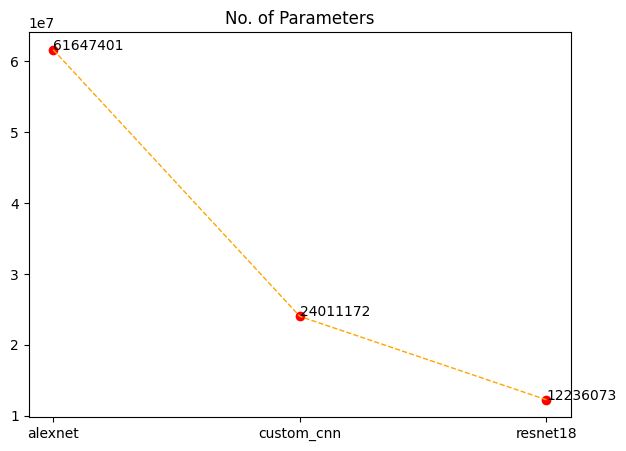

In [5]:
# number of params/neurons

lists = sorted(list(data["params"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples
x, y = zip(*lists)

fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, c='r')
ax.set_title('No. of Parameters')
plt.plot(x, y, c='orange', linestyle='dashed', linewidth=1)
for i,j in zip(x,y):
    ax.annotate(str(f"{j}"),xy=(i,j+0.001))
plt.show()

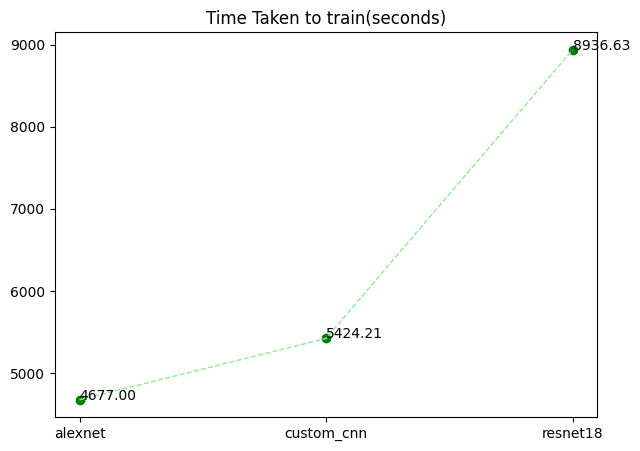

In [6]:
# time taken

lists = sorted(list(data["time_taken"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples
x, y = zip(*lists)

fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, c='green')
ax.set_title('Time Taken to train(seconds)')
plt.plot(x, y, c='lightgreen', linestyle='dashed', linewidth=1)
for i,j in zip(x,y):
    ax.annotate(str(f"{j:.02f}"),xy=(i,j+0.001))
plt.show()

In [9]:
# valid accuracy
"""
lists = sorted(list(data["valid_accuracy"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples

fig, ax = plt.subplots(figsize = (7,5))
ax.set_title('Training valid accuracy')
x = [list(range(25)) for _ in lists]
y = np.asarray([dict_tuple[1] for dict_tuple in lists])

colors = ['red', 'green', 'blue', 'orange', 'cyan', 'black']

for i, item in enumerate(lists):
    plt.plot(x[i], y[i], c=colors[i%(len(colors))], label=item[0], linewidth=1)

plt.legend()
plt.show()

"""

'\nlists = sorted(list(data["valid_accuracy"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples\n\nfig, ax = plt.subplots(figsize = (7,5))\nax.set_title(\'Training valid accuracy\')\nx = [list(range(25)) for _ in lists]\ny = np.asarray([dict_tuple[1] for dict_tuple in lists])\n\ncolors = [\'red\', \'green\', \'blue\', \'orange\', \'cyan\', \'black\']\n\nfor i, item in enumerate(lists):\n    plt.plot(x[i], y[i], c=colors[i%(len(colors))], label=item[0], linewidth=1)\n\nplt.legend()\nplt.show()\n\n'

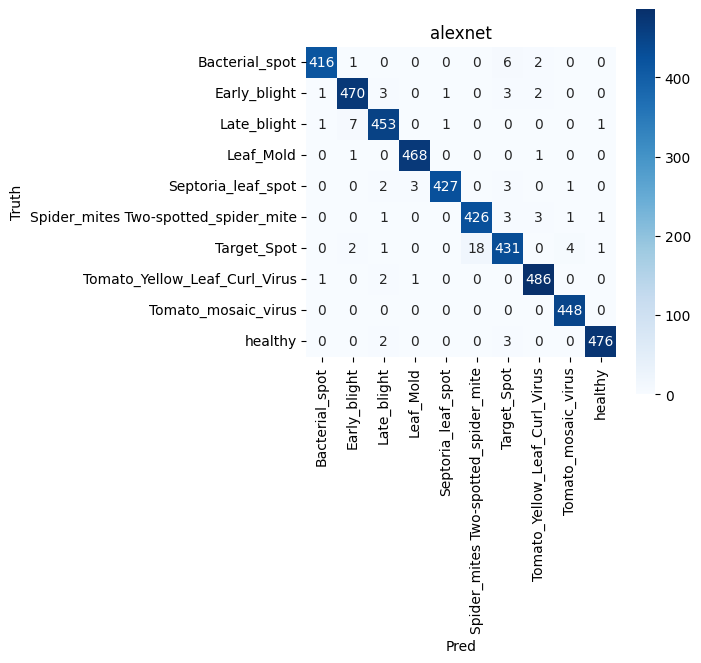

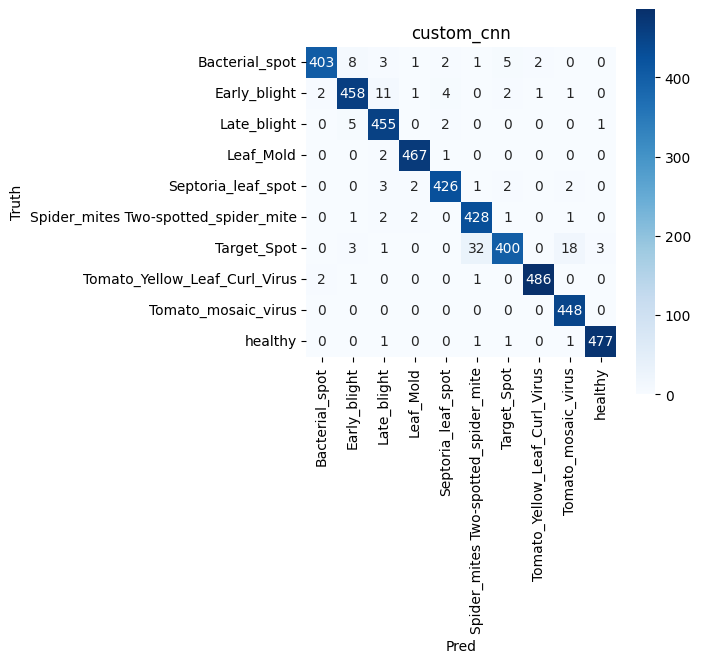

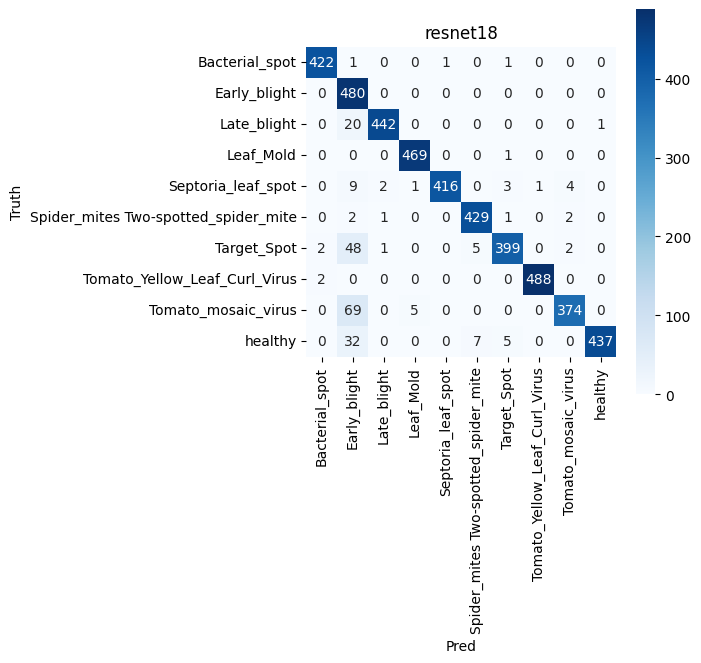

In [10]:
#confusion matrix

lists = sorted(list(data["confusion_matrix"].items()), key=lambda a: a[0]) # sorted by key, return a list of tuples

classes_list = [i[9:] for i in data["classes"]]

for name, matrix in lists:
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(matrix, square=True, annot=True, cmap='Blues', fmt='d', xticklabels=classes_list, yticklabels=classes_list)
    ax.set_title(name)
    ax.set(xlabel="Pred", ylabel="Truth")
    plt.show()